## Exploring Places

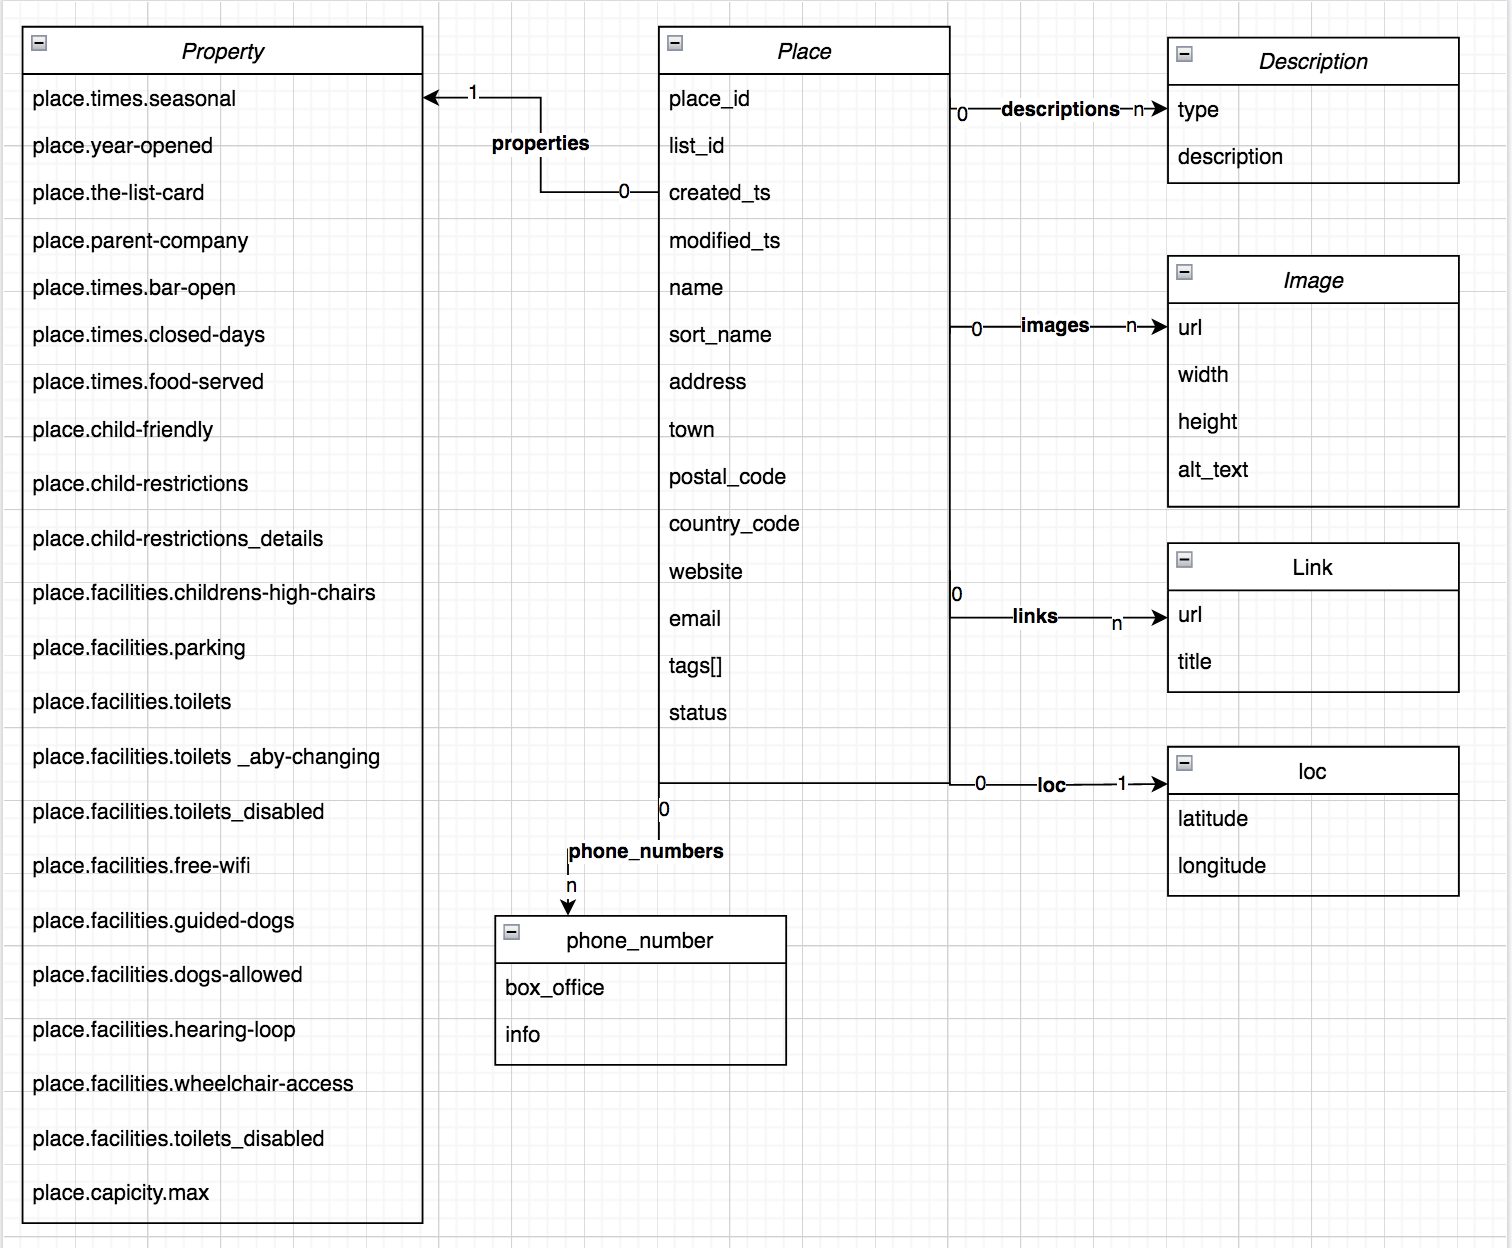

## Experiments:

- 1. Visualizing Places dataset
- 2. Exploring Tags Places
- 3. Exploring Towns & Places Names
- 4. Exploring Properities
- 5. Exploring Descriptions Places Similarities
- 6. Descriptions Places Topic Modelling

In [6]:
import json
import pandas as pd
import plotly.express as px
import os
import plotly.graph_objects as go
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from bertopic import BERTopic

In [7]:
#data="places.json"
data="dataset/sample_20180501.json"
with open('dataset/sample_20180501.json', 'r') as f:
    data = json.load(f)
    print(len(data["places"]))
    places=data["places"]
df = pd.DataFrame(places)

1224


### 2. Visualizing the places dataframe

In [10]:
df["properties"].iloc[0]

{'place.child-restrictions': True,
 'place.facilities.free-wifi': True,
 'place.facilities.dogs-allowed': False,
 'place.facilities.parking': True,
 'place.facilities.toilets': True,
 'place.facilities.toilets.disabled': False,
 'place.facilities.wheelchair-access': False,
 'place.capacity.max': '160'}

In [4]:
df.shape[0]

1224

###  Experiment 1: Exploring Place Ids

In [5]:
df_ids=df.groupby(['place_id']).size().reset_index()
df_ids=df_ids.rename(columns={0: "number_of_times"}).sort_values(by=['number_of_times'], ascending=False)
df_ids

place_id  number_of_times
0            1                1
813      60849                1
820      61545                1
819      61451                1
818      61204                1
...        ...              ...
407      22375                1
406      22225                1
405      22215                1
404      22207                1
1223    114042                1

[1224 rows x 2 columns]

### Experiment 2: Exploring Tags Places

We are going to separete the elements stored in each tag list into new rows. 


In [6]:
df["tags"][0:5]

0        [Bar & pub food, Comedy, Restaurants, Venues]
1    [Cinemas, Community centre, Public buildings, ...
2    [Arts Centre, Galleries, Language School, Publ...
3                         [Conference Centres, Venues]
4                                   [Theatres, Venues]
Name: tags, dtype: object

In [7]:
df_tags=df.explode('tags')

In [8]:
df_tags

address                 email postal_code  \
0            5 York Place  admin@thestand.co.uk     EH1 3EB   
0            5 York Place  admin@thestand.co.uk     EH1 3EB   
0            5 York Place  admin@thestand.co.uk     EH1 3EB   
0            5 York Place  admin@thestand.co.uk     EH1 3EB   
1       10 Orwell Terrace                   NaN    EH11 2DY   
...                   ...                   ...         ...   
1220                                        NaN    EH32 0QB   
1221      4 Picardy Place                   NaN     EH1 3JT   
1222       Edinburgh Road                   NaN    EH49 6AB   
1223  19-21 George Street                   NaN     EH2 2PB   
1223  19-21 George Street                   NaN     EH2 2PB   

                                             properties  \
0     {'place.child-restrictions': True, 'place.faci...   
0     {'place.child-restrictions': True, 'place.faci...   
0     {'place.child-restrictions': True, 'place.faci...   
0     {'place.child-restrictions': True, 'place.faci...   
1                                                   NaN   
...                                                 ...   
1220                                                NaN   
1221                                                NaN   
1222                                                NaN   
1223                                                NaN   
1223                                                NaN   

                                      sort_name        town  \
0                                         Stand   Edinburgh   
0                                         Stand   Edinburgh   
0                                         Stand   Edinburgh   
0                                         Stand   Edinburgh   
1                             St Bride's Centre   Edinburgh   
...                                         ...         ...   
1220              Aberlady Local Nature Reserve  Longniddry   
1221                    Tokyo Bar And Nightclub   Edinburgh   
1222  Old Pavilion at Linlithgow Cricket Ground  Linlithgow   
1223                    Principal George Street   Edinburgh   
1223                    Principal George Street   Edinburgh   

                                                website  place_id  \
0                             http://www.thestand.co.uk         1   
0                             http://www.thestand.co.uk         1   
0                             http://www.thestand.co.uk         1   
0                             http://www.thestand.co.uk         1   
1                         http://stbrides.wordpress.com       371   
...                                                 ...       ...   
1220                                                NaN    112611   
1221       https://www.facebook.com/tokyonightclubedin/    112723   
1222                                                NaN    113099   
1223  https://www.phcompany.com/principal/edinburgh-...    114042   
1223  https://www.phcompany.com/principal/edinburgh-...    114042   

               modified_ts            created_ts  \
0     2021-11-24T12:18:33Z  2021-11-24T12:18:33Z   
0     2021-11-24T12:18:33Z  2021-11-24T12:18:33Z   
0     2021-11-24T12:18:33Z  2021-11-24T12:18:33Z   
0     2021-11-24T12:18:33Z  2021-11-24T12:18:33Z   
1     2019-12-04T13:27:26Z  2019-12-04T13:27:26Z   
...                    ...                   ...   
1220  2018-10-12T15:32:19Z  2018-10-12T15:32:19Z   
1221  2018-10-15T16:54:59Z  2018-10-15T16:54:59Z   
1222  2018-10-26T17:04:32Z  2018-10-26T17:04:32Z   
1223  2018-11-29T17:04:07Z  2018-11-29T17:04:07Z   
1223  2018-11-29T17:04:07Z  2018-11-29T17:04:07Z   

                                               name  \
0                                         The Stand   
0                                         The Stand   
0                                         The Stand   
0                                         The Stand   
1                                 St Bride's Centre   
...        

In [9]:
g_tags=df_tags.groupby(['tags']).size().reset_index()
g_tags=g_tags.rename(columns={0: "number_of_times"}).sort_values(by=['number_of_times'], ascending=False)
g_tags

tags  number_of_times
233     Public buildings              224
317               Venues              224
217             Outdoors              180
242          Restaurants              155
234          Pubs & bars              150
..                   ...              ...
163  Housing Association                1
164                   IT                1
165            Ice Cream                1
166            Ice cream                1
349             tea shop                1

[350 rows x 2 columns]

In [10]:
px.histogram(g_tags, x="tags", y="number_of_times", histfunc="sum", color="tags", title='Frequency of tags places')

### Experiment 3: Exploring Towns & Names


In [11]:
df["town"][1:10]

1    Edinburgh
2    Edinburgh
3    Edinburgh
4    Edinburgh
5    Edinburgh
6    Edinburgh
7    Edinburgh
8    Edinburgh
9    Edinburgh
Name: town, dtype: object

#### 3.1 Frequency of places grouped by  towns

In [12]:
df_town=df.dropna(subset=['town'])
town=df_town.groupby(['town']).size().reset_index()
town=town.rename(columns={0: "number_of_times"})
town=town.drop([0])

In [13]:
town=town.sort_values(by=['number_of_times'], ascending=False)
town

town  number_of_times
45     Edinburgh              736
38   Dunfermline               38
121   St Andrews               31
37        Dunbar               17
71     Kirkcaldy               17
..           ...              ...
86   Lothianburn                1
33       Dairsie                1
34   Dalgety Bay                1
40       EH8 8BL                1
136    nr Dunbar                1

[136 rows x 2 columns]

In [14]:
px.scatter(town, x='town', y='number_of_times', color='number_of_times',  size="number_of_times", size_max=60, title="Frequency of places grouped by towns")


####  3.2 Frequency of places grouped by name 

In [15]:
df_name_town=df.groupby(['name']).size().reset_index()
df_name_town=df_name_town.rename(columns={0: "number_of_times"})
df_name_town=df_name_town.sort_values(by=['number_of_times'], ascending=False)
df_name_town.reset_index()

index                                  name  number_of_times
0      1167                           Waterstones                7
1      1121               University of Edinburgh                2
2       308           Edinburgh Napier University                2
3       437                   Holy Trinity Church                2
4       879               St Mary's Parish Church                2
...     ...                                   ...              ...
1206    404              Halliwell’s House Museum                1
1207    403        Hallhill Healthy Living Centre                1
1208    402  Haddington School of Dance and Music                1
1209    401              Haddington Corn Exchange                1
1210   1210                  theSpace on the Mile                1

[1211 rows x 3 columns]

#### 3.3. Frequency of places  grouped by name and town

In [16]:
df_name_town=df.groupby(['name', 'town']).size().reset_index()
df_name_town=df_name_town.rename(columns={0: "number_of_times"})
df_name_town=df_name_town.sort_values(by=['number_of_times'], ascending=False)
df_name_town

name       town  number_of_times
1170                     Waterstones  Edinburgh                3
308      Edinburgh Napier University  Edinburgh                2
1206                   ZOO Charteris  Edinburgh                2
1123         University of Edinburgh  Edinburgh                2
13                         52 Canoes  Edinburgh                2
...                              ...        ...              ...
406                    Harehead Farm  Cranshaws                1
405                      Hanover Tap  Edinburgh                1
404         Halliwell’s House Museum    Selkirk                1
403   Hallhill Healthy Living Centre     Dunbar                1
1216            theSpace on the Mile  Edinburgh                1

[1217 rows x 3 columns]

### Experiment 4: Exploring Properities

In [17]:
df_properties=pd.concat([df.drop(['properties'], axis=1), df['properties'].apply(pd.Series)], axis=1)

In [18]:
df_properties[0:3]

address                                       email  \
0            5 York Place                        admin@thestand.co.uk   
1       10 Orwell Terrace                                         NaN   
2  West Parliament Square  ifecosse.edimbourg-cslt@diplomatie.gouv.fr   

  postal_code                   sort_name       town  \
0     EH1 3EB                       Stand  Edinburgh   
1    EH11 2DY           St Bride's Centre  Edinburgh   
2     EH1 1RN  Institut Français d'Ecosse  Edinburgh   

                         website  place_id           modified_ts  \
0      http://www.thestand.co.uk         1  2021-11-24T12:18:33Z   
1  http://stbrides.wordpress.com       371  2019-12-04T13:27:26Z   
2     http://www.ifecosse.org.uk       372  2021-02-23T16:57:44Z   

             created_ts                        name  ...  \
0  2021-11-24T12:18:33Z                   The Stand  ...   
1  2019-12-04T13:27:26Z           St Bride's Centre  ...   
2  2021-02-23T16:57:44Z  Institut Français d'Ecosse  ...   

  place.child-restrictions place.facilities.dogs-allowed  \
0                     True                         False   
1                      NaN                           NaN   
2                      NaN                           NaN   

  place.facilities.free-wifi place.facilities.guide-dogs  \
0                       True                         NaN   
1                        NaN                         NaN   
2                      False                         NaN   

  place.facilities.hearing-loop place.facilities.parking  \
0                           NaN                     True   
1                           NaN                      NaN   
2                           NaN                    False   

   place.facilities.toilets place.facilities.toilets.baby-changing  \
0                      True                                    NaN   
1                       NaN                                    NaN   
2                     False                                    NaN   

  place.facilities.toilets.disabled place.facilities.wheelchair-access  
0                             False                              False  
1                               NaN                                NaN  
2                             False                               True  

[3 rows x 29 columns]

#### 4.1 Frequency of places grouped by wheelchair-access and town 

In [19]:
df_properties_wc=df_properties.groupby(['place.facilities.wheelchair-access', 'town']).size().reset_index()
df_properties_wc=df_properties_wc.rename(columns={0: "number_of_times"})
df_properties_wc=df_properties_wc.sort_values(by=['number_of_times'], ascending=False)
df_properties_wc

place.facilities.wheelchair-access                town  number_of_times
23                                True           Edinburgh              129
6                                False           Edinburgh               69
22                                True         Dunfermline                7
45                                True          St Andrews                5
38                                True         Musselburgh                3
30                                True           Kirkcaldy                2
32                                True          Livingston                2
12                               False   South Queensferry                2
34                                True            Loanhead                2
35                                True           Lochgelly                2
7                                False              Hawick                2
44                                True             Selkirk                2
4                                False         Dunfermline                2
25                                True            Falkland                2
31                                True          Linlithgow                1
33                                True  Livingston village                1
0                                False          Anstruther                1
39                                True            Newburgh                1
36                                True         Lothianburn                1
37                                True             Melrose                1
28                                True            Jedburgh                1
40                                True       North Berwick                1
41                                True             Peebles                1
42                                True        Peeblesshire                1
43                                True         Prestonpans                1
46                                True           St Monans                1
29                                True       Juniper Green                1
24                                True            Eyemouth                1
27                                True              Hawick                1
26                                True          Glenrothes                1
2                                False            Dalkeith                1
3                                False              Dunbar                1
5                                False                Duns                1
8                                False           Kirkcaldy                1
9                                False             Peebles                1
10                               False          Pittenweem                1
11                               False         Prestonpans                1
13                               False          St Andrews                1
14                               False          Wilkieston                1
15                                True            Aberlady                1
16                                True          Anstruther                1
17                                True       Auchtermuchty                1
18                                True            Bathgate                1
19                                True           Cockenzie                1
20                                True               Cupar                1
21                                True            Dirleton                1
1                                False            Bathgate                1
47                                True             Tranent                1

#### 4.2 Frequency of places grouped by toilets_disabled and town 

In [20]:
df_properties_td=df_properties.groupby(['place.facilities.toilets.disabled', 'town']).size().reset_index()
df_properties_td=df_properties_td.rename(columns={0: "number_of_times"})
df_properties_td=df_properties_td.sort_values(by=['number_of_times'], ascending=False)
df_properties_td

place.facilities.toilets.disabled                town  number_of_times
23                               True           Edinburgh              117
7                               False           Edinburgh               73
22                               True         Dunfermline                6
30                               True           Kirkcaldy                3
44                               True          St Andrews                3
5                               False         Dunfermline                3
37                               True         Musselburgh                2
13                              False             Peebles                2
25                               True            Falkland                2
32                               True          Livingston                2
16                              False          St Andrews                2
15                              False   South Queensferry                2
27                               True              Hawick                2
42                               True         Prestonpans                2
38                               True            Newburgh                1
29                               True       Juniper Green                1
39                               True       North Berwick                1
40                               True        Peeblesshire                1
36                               True             Melrose                1
35                               True         Lothianburn                1
34                               True           Lochgelly                1
33                               True            Loanhead                1
41                               True          Pittenweem                1
43                               True             Selkirk                1
31                               True          Linlithgow                1
45                               True           St Monans                1
46                               True             Tranent                1
0                               False            Aberlady                1
24                               True            Eyemouth                1
28                               True            Jedburgh                1
11                              False           Lochgelly                1
2                               False            Bathgate                1
3                               False               Cupar                1
4                               False              Dunbar                1
6                               False                Duns                1
8                               False              Hawick                1
9                               False  Livingston village                1
10                              False            Loanhead                1
12                              False         Musselburgh                1
26                               True          Glenrothes                1
14                              False             Selkirk                1
17                               True          Anstruther                1
18                               True       Auchtermuchty                1
19                               True            Bathgate                1
20                               True           Cockenzie                1
21                               True            Dalkeith                1
1                               False          Anstruther                1
47                               True          Wilkieston                1

### 5. Exploring Descriptions

In [21]:
df_descriptions=df.explode('descriptions')
df_descriptions=pd.concat([df_descriptions.drop(['descriptions'], axis=1), df_descriptions['descriptions'].apply(pd.Series)], axis=1)
df_descriptions=df_descriptions.dropna(subset=['description']).reset_index()
documents=df_descriptions["description"].values

In [22]:
len(documents)

404

In [23]:
#documents

#### Generating Text Embeddings

In [24]:
model = SentenceTransformer('all-MiniLM-L6-v2')
#Training our text_embeddings - using the descriptions available & all-MiniLM-L6-v2 Transformer
text_embeddings = model.encode(documents, batch_size = 8, show_progress_bar = True)



In [25]:
np.shape(text_embeddings)

(404, 384)

#### Description Similarity 

In [26]:
similarities = cosine_similarity(text_embeddings)
similarities_sorted = similarities.argsort()
id_1 = []
id_2 = []
score = []
for index,array in enumerate(similarities_sorted):
    p=len(array)
    id_1.append(index)
    id_2.append(array[-2])
    score.append(similarities[index][array[-2]])
index_df = pd.DataFrame({'id_1' : id_1,
                          'id_2' : id_2,
                          'score' : score})
print(index_df)



     id_1  id_2     score
0       0   155  0.465363
1       1   195  0.513309
2       2   400  0.524068
3       3    12  0.541578
4       4   231  0.574484
..    ...   ...       ...
399   399   372  0.595814
400   400   392  0.670403
401   401   267  0.495739
402   402   299  0.577223
403   403   371  0.285343

[404 rows x 3 columns]


In [27]:
index_df["score"].sort_values(ascending=False)

85     0.864806
86     0.864806
132    0.859234
133    0.859234
61     0.847924
         ...   
232    0.312205
318    0.296475
403    0.285343
349    0.265690
321    0.231058
Name: score, Length: 404, dtype: float32

In [28]:
index_df.iloc[85]

id_1     85.000000
id_2     86.000000
score     0.864806
Name: 85, dtype: float64

**NOTE:** Documents 5 and 7 seems to be the most similar. Lets see what they have

In [29]:
documents[85]

'Docked in Leith, the Royal Yacht Britannia proudly served the Royal Family as its only floating residence for 44 years, travelling on nearly 1000 voyages. The magnificent ship is now open to the public and visitors vote it as one of the best Scottish attractions over and over again for decades. With the self-guided tours (available in 30 languages) you can see for yourself what life was like on the Britannia back in the days. Explore the richly decorated royal rooms, experience what it feels like to descend under the deck or simply enjoy the view of the sea. The ship serves as a luxury hotel and holds various events throughout the year. Getting a lovely cup of tea in the Royal Deck Tea Room or buying a charming souvenir from the gift shop will crown the visit.'

In [30]:
documents[86]

"Rated Scotland’s Best Visitor Attraction for 13 years by national tourism agency VisitScotland, Britannia was home to Her Majesty The Queen and the Royal Family for over 40 years, sailing one million miles around the world. Berthed in Edinburgh's historic Port of Leith, Britannia is now a five-star visitor attraction, as well as an exclusive evening events venue.\n\nStep aboard and follow in the footsteps of royalty to see where Prince Charles and Princess Diana honeymooned and Liz Taylor, Frank Sinatra and presidents Reagan, Mandela and Gorbachev were wined and dined.\n\nThere are five main decks to explore with a fascinating audio guide included in the ticket price, as well as a version for children. We also provide British Sign Language tablets, Braille script and each deck is fully accessible for buggies and wheelchairs. Take in stunning waterfront views from The Royal Deck Tea Room where delicious home-made cakes, soups and sandwiches are served. Experience The Royal Yacht Britan

### 6. Topic Modelling

In [31]:
topic_model = BERTopic(min_topic_size=20).fit(documents, text_embeddings)
topics, probs = topic_model.transform(documents, text_embeddings)
topic_model.visualize_topics()

In [32]:
topic_model.visualize_barchart()

In [33]:
topic_model.visualize_heatmap()

In [34]:
topic_model.get_topic_freq()

Topic  Count
0     -1    157
1      0     97
2      1     63
3      2     48
4      3     39